In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from emg_dec_fastica import base, metrics

path = '../Data/ramp_10mu_20s/emg_data.csv'
raw_signal = base.dataloader(path)
dec = base.fastica_decomposer(raw_signal, n_components=10, sym=True)
out = dec.decompose()
del dec

In [2]:
out.keys()

dict_keys(['sample_rate', 'spike_trains', 'spike_times', 'spike_trains_fICA', 'signal_fICA', 'signal_cICA', 'delay', 'waveform_length', 'threshold', 'waveforms', 'run_time'])

In [3]:
path = '../Data/ramp_10mu_20s/mu_spikes.csv'
ref = base.dataloader(path)

In [4]:
from emg_dec_fastica.metrics import Metrics
mtr = Metrics(out['sample_rate'])

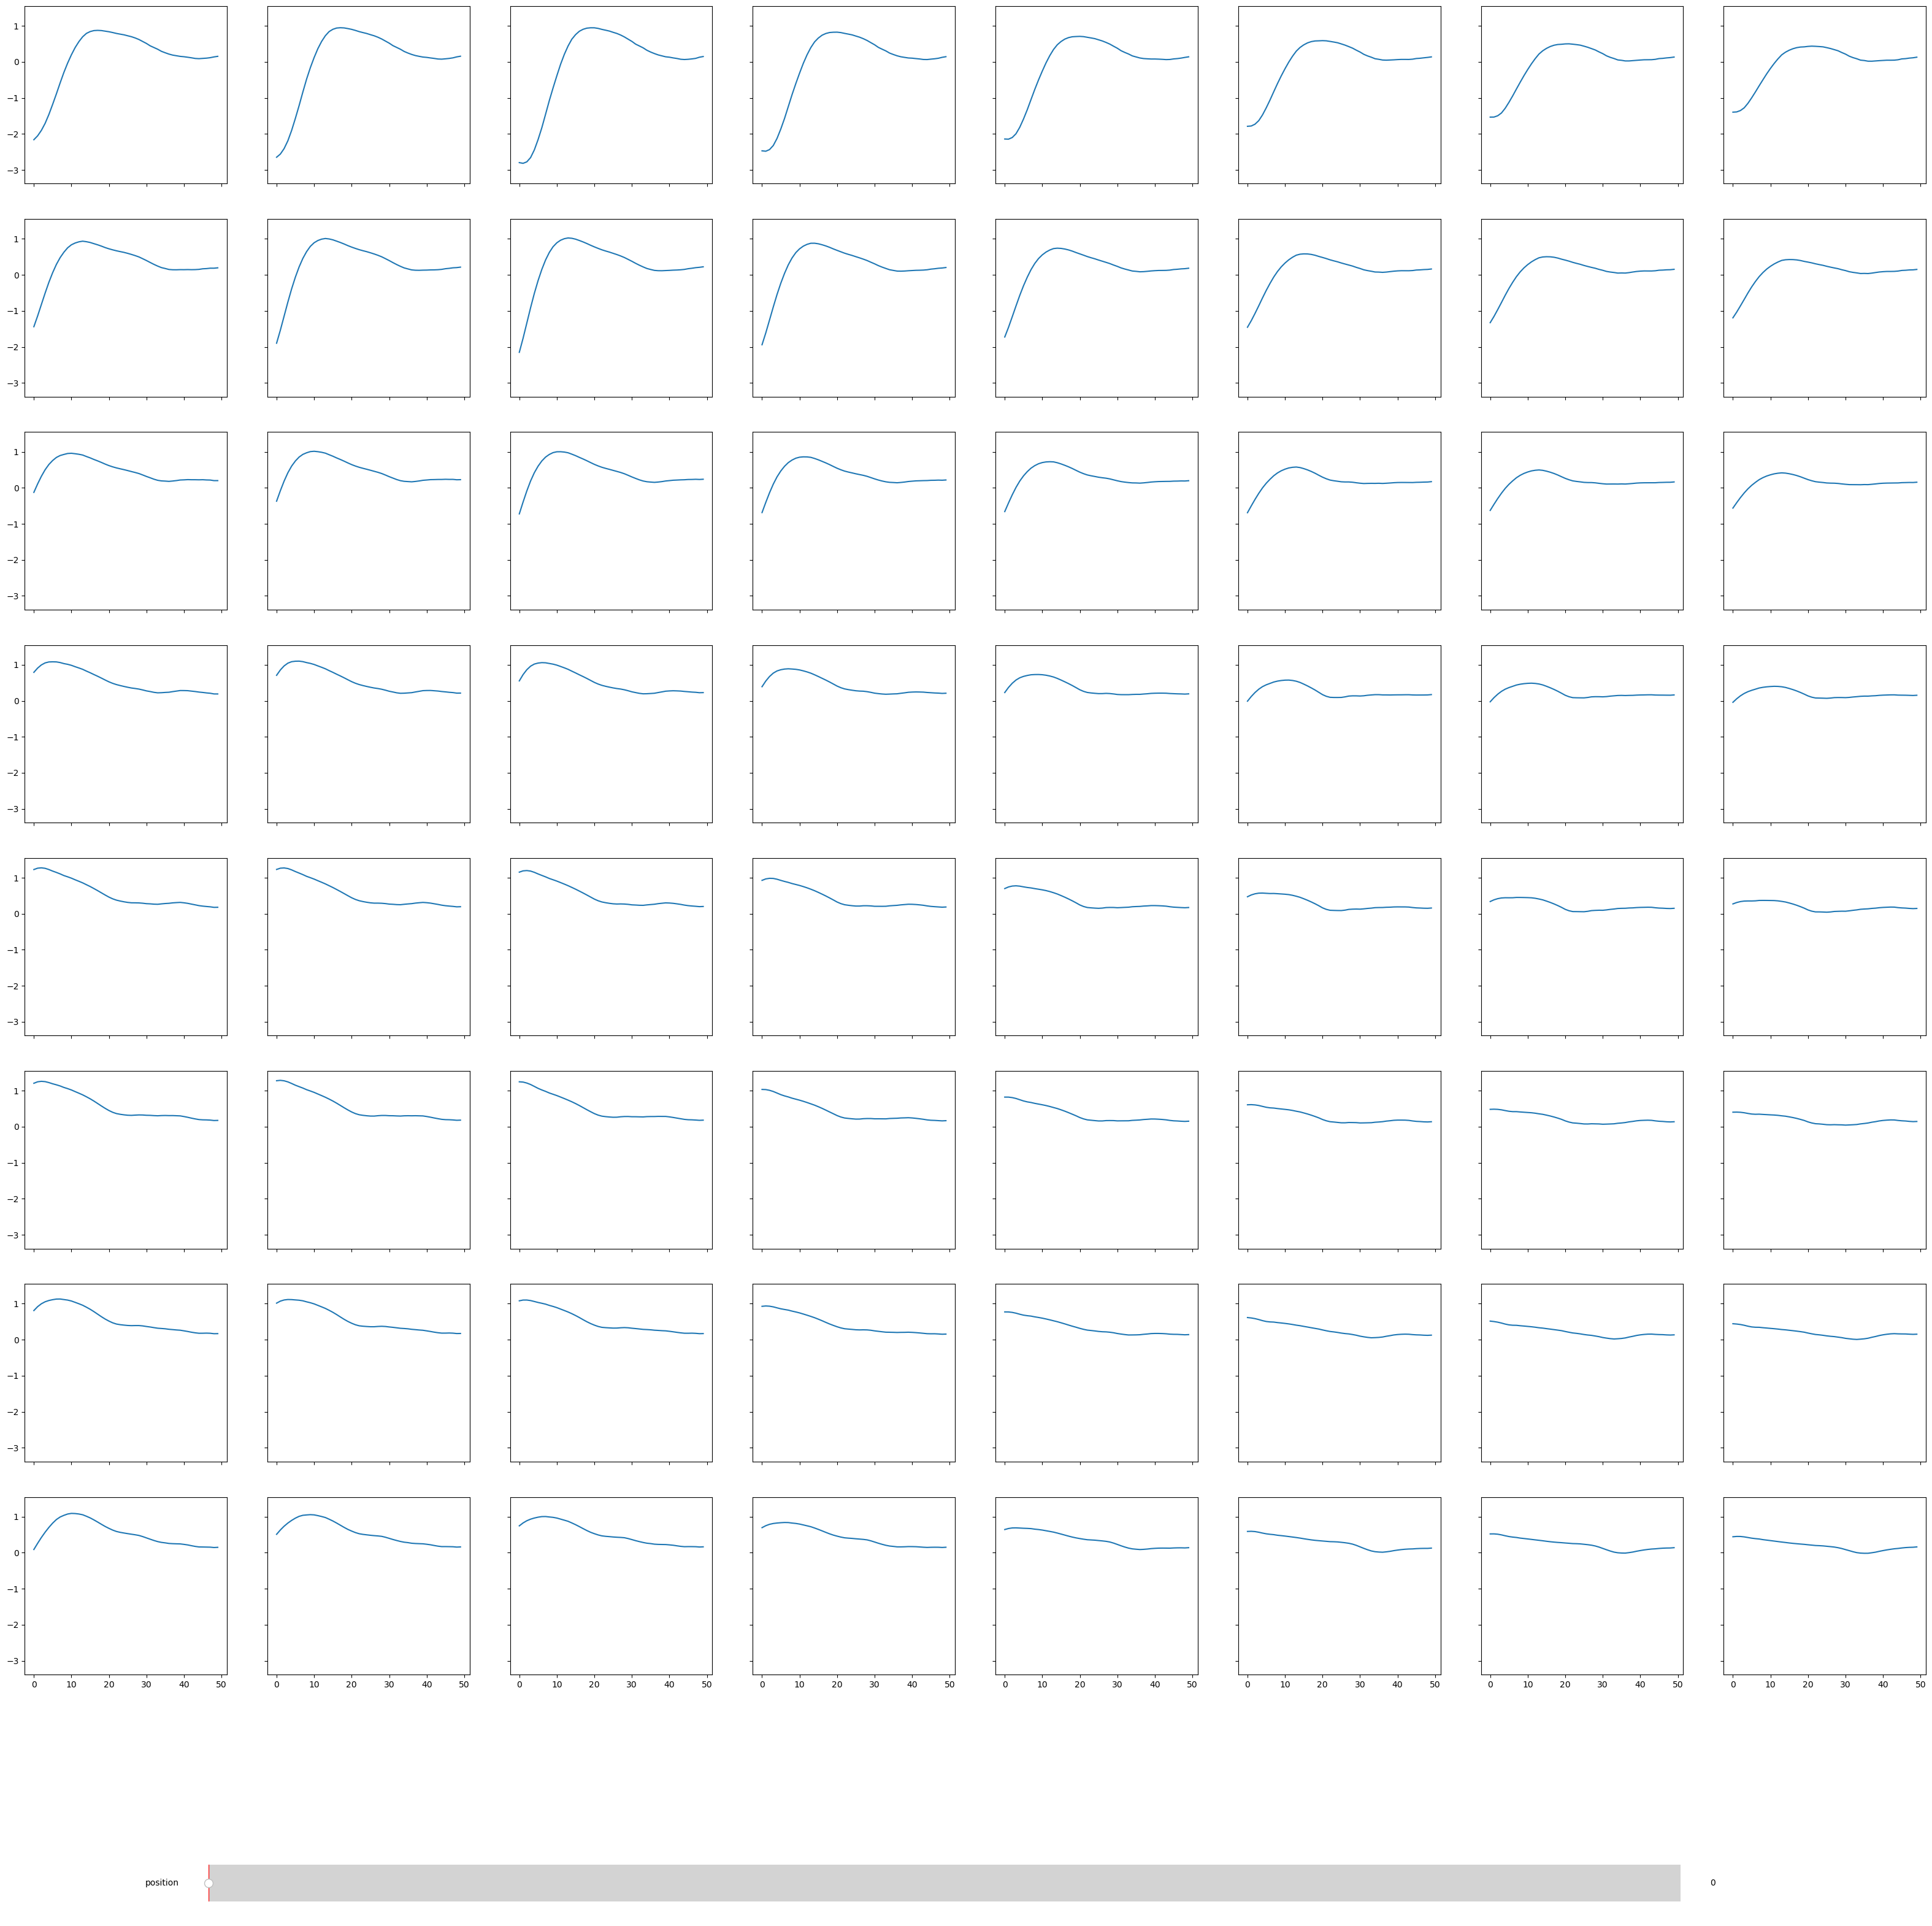

In [5]:
import matplotlib.pyplot as plt
mtr.plot_muap_map(out['waveforms'].T,out['waveform_length'],ind=0)


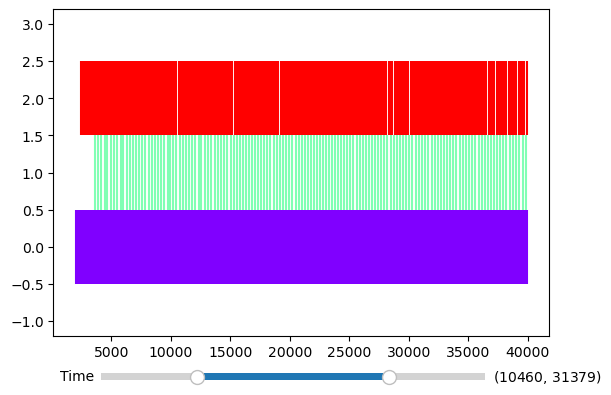

In [6]:
mtr.plot_spike_raster(out['spike_trains'].to_dense().cpu())

In [7]:
# get index of the corespoing reference spike trains
mtr.evaluate(out['spike_trains'].to_dense().cpu(), 
             ref
             )

(tensor([1.0150, 1.0057, 0.7033], dtype=torch.float64),
 tensor([5, 9, 6]),
 tensor([-1, -1, -2]))

In [9]:
out['signal_fICA'].shape

torch.Size([3, 40000])

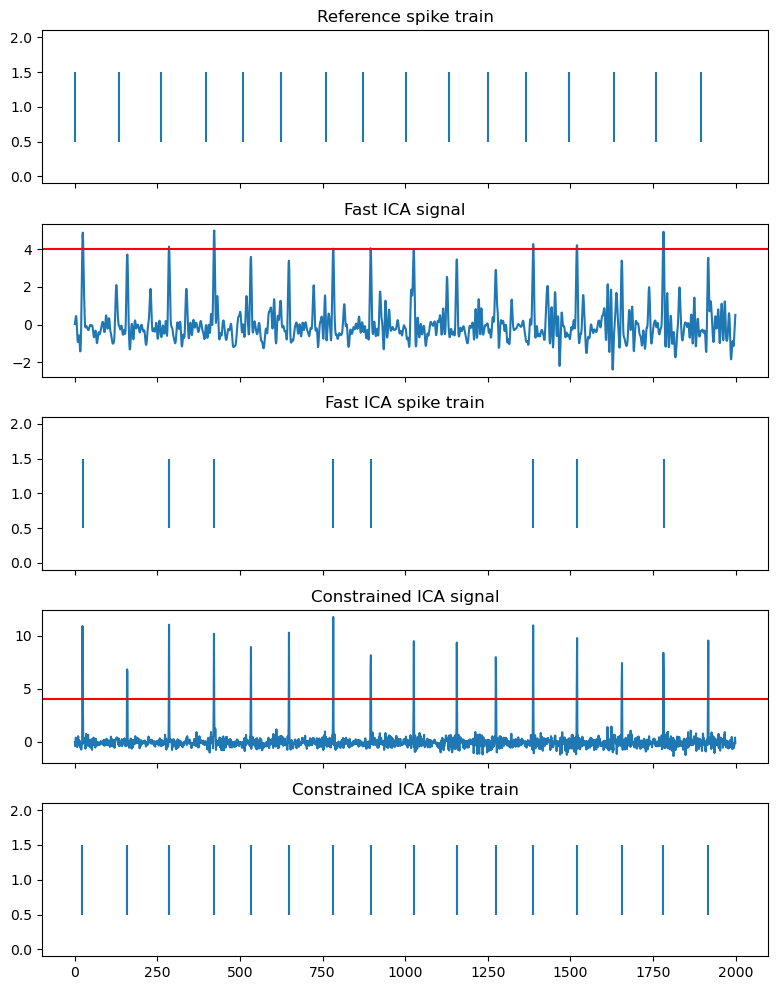

In [14]:
ind_eval = 0
ind_ref = 5
start = 2000
end = 4000
mtr.plot_time_serise(ref[ind_ref][start:end],
                     out['signal_fICA'][ind_eval][start:end], 
                     out['spike_trains_fICA'][ind_eval].to_dense()[start:end],
                     out['signal_cICA'][ind_eval][start:end],
                     out['spike_trains'][ind_eval].to_dense()[start:end],
                     thh=4
                     )